# DSCI 531 Lab 4 - Exploratory data analysis

## Introduction

In this lab, you will be choosing a dataset to do some exploratory data analysis. Your goal is to produce a readable, runnable jupyter notebook that takes your audience through the various stages of exploratory data analysis from initially loading the data, to any wrangling or cleaning needed, and finally visualizing trends in the data to help answer the research questions. The purpose of this lab is for you to practice EDA with visualizations and a little bit of wrangling. Its purpose is NOT for you to spend a tonne of time cleaning your data. The sample datsets provided require minimal cleaning. If you choose your own dataset, please ensure you avoid datasets that require too much cleaning. No matter which dataset you choose, there will likely be some wrangling involved. To help you with exploring the data, coming up with good research questions, and any wrangling, the DSCI 531 teaching team has scheduled additional office hours this week to help you. 

**In addition, Tom has very kindly agreed to open up the instructor and TAs office hours for DSCI 523 for you to get additional help with wrangling.** Though we will not be explicitly assessing wrangling in 531, I encourage you to use our office hours to help you explore the dataset you choose! Note: wrangling can be done in either R or python (if in R, save the wrangled data to disk and read it in) but the plots in this lab must be done in Altair. 

- **The final version of Lab 4 needs to be submitted by the usual weekly deadline (Saturday November 9th at 6PM)**
- **Your peer-review is due at a special time, on Tuesday November 12th at 11:59 PM.**

<img src="https://i.imgur.com/D0kcArC.png" alt="Read_This" style="width: 150px;"/>

## Lab 4 Learning Outcomes

In this lab you will:

- Develop an exploratory data analysis plan with an unfamiliar dataset
- Apply effective design principles to visual representations of data
- Use the `Altair` library in `python` to generate visual representations of data for several plot types

## How will I be graded?

- The MDS rubrics can be found [here](https://github.com/UBC-MDS/public/tree/master/rubric). 
- Solutions to the practice problems are provided in the students repo for the course
- Each question below is assigned points assigned to MDS rubrics 

## Overall submission
rubric={mechanics:5, writing: 18}

- Please make sure you check your spelling, grammar, punctuation, and ensure that your writing has good logical structure and flow
- To submit this assignment, submit this jupyter notebook with your answers embedded in the appropriate cells.
- Update your README file with the questions and links to your submission.
- Follow the general [lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

## Pre-lab

- Think a bit about which dataset you would like to use for lab 4. The lab will be your opportunity to get feedback from TAs about your ideas on how to explore the dataset you chose. In this lab, you will also be able to use your own data set to do some exploratory data analysis

In [1]:
# Load packages

import pandas as pd
import altair as alt

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## 0. Choose a dataset

The first three options are all part of the `vega-datasets` python package. You can browse other vega datasets [here](https://observablehq.com/@randomfractals/vega-datasets).

Option 1: [`Jobs`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/jobs.json)

Option 2: [`Movies`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json)

Option 3: [`Stocks`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/stocks.csv)

Option 4: Choose your own dataset (highly recommended that you get this approved by a DSCI531 TA during labs, or office hours)

You can search for other datasets here:

- [fivethirtyeight](https://data.fivethirtyeight.com)
- [Buzzfeed](https://github.com/BuzzFeedNews/everything)
- [Data.gov](https://www.data.gov/)
- [data.world](https://data.world/) (requires free account)

**Note: Though it may sound easy, it is not trivial to choose an interesting and relevant dataset. There are thousands out there and the [tyranny of choice](https://www.economist.com/christmas-specials/2010/12/16/you-choose) is pretty overwhelming. If you really want to choose your own dataset, I'd suggest you set a 30 minute timer, start searching, and then choose one before the timer expires. I advise you NOT to sink too much time into choosing a dataset as it's not the purpose of this lab.**

## 1. Describe your dataset
rubric:{reasoning:4}

**Task: Describe your dataset. Consider the following questions to guide you in your exploration**

- Who: Which company/agency/organization provided this data?
- What: What is in your data?
- When: When was your data collected (for example, for which years)?
- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc...
- How: How was your data collected? Was it a human collecting the data? Historical records digitized? Server logs?

*Submission Hint: You probably will not need more than 250 words to describe your dataset. All the questions above do not need to be answered, it's more to guide your exploration and think a little bit about the context of your data. It is also possible you will not know the answers to some of the questions above, that is FINE - data scientists are often faced with the challenge of analyzing data from unknown sources. Do your best, acknowledge the limitations of your data as well as your understanding of it. Also, make it clear what you're speculating about. For example, "I speculate that the {...column_name...} column must be related to {....} because {....}."*

- Who: vega-datasets did not specify a source for the data
- What: Information on 255 different jobs, and the number of people who held that job in a particular year
- When: From 1850 to 2000 in increments of 10 years
- Why: No intent was explicitly specified, but my guess is to see the gender divide in careers over time
- How: No information was provided on how the data was collected, although judging by the years over

## 2. Load the dataset
rubric:{correctness:1}

**Task: Load your dataset from a file, or URL. This needs to be a pandas dataframe so you can use it with Altair. Remember that others may be running your jupyter notebook so it's important that the data is accessible to them. If your dataset isn't accessible as a URL, make sure to commit it into your repo.**

In [2]:
# need this to access data
from vega_datasets import data 
# I jsut want to use this one
import numpy

In [3]:
df = data.jobs()

## 3. Explore your dataset
rubric:{correctness:5}

**Task: Explore the columns in your dataset. Which ones are interesting/relevant? You can use the same scheme I outlined in Lab 3, Exercise 2 or come up with your own system. By now, you should also know about [df.describe()](http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/) so you can use that as an aid if you think it's useful and appropriate.**

In [4]:
df.head()

,job,sex,year,count,perc
0,Accountant / Auditor,men,1850,708,0.000131
1,Accountant / Auditor,men,1860,1805,0.000214
2,Accountant / Auditor,men,1870,1310,0.000100
3,Accountant / Auditor,men,1880,2295,0.000125
4,Accountant / Auditor,men,1900,11753,0.000396


In [5]:
df.describe()

,year,count,perc
count,7650.000000,7.650000e+03,7650.000000
mean,1927.333333,1.253996e+05,0.001961
std,46.688762,5.400795e+05,0.011024
min,1850.000000,0.000000e+00,0.000000
25%,1880.000000,0.000000e+00,0.000000
50%,1930.000000,3.538000e+03,0.000079
75%,1970.000000,4.094400e+04,0.000678
max,2000.000000,1.127078e+07,0.446872


In [6]:
print("The dataframe columns are: ", list(df.columns), "\n")


jobs_list = sorted(list(df['job'].unique()))
print("- The jobs range from {0} to {1} and there are {2} jobs.".format(jobs_list[0],
                                                                        jobs_list[-1],
                                                                        len(jobs_list)), "\n")

years_list = sorted(list(df['year'].unique()))
print("- The years range from {0:.0f} to {1:.0f} and there are {2} years.".format(years_list[0],
                                                                                  years_list[-1],
                                                                                  len(years_list)), "\n")

count_list = sorted(list(df['count'].unique()))
print("- The counts range from {0:.0f} to {1:.0f}, with an average count of {2:.0f}.".format(count_list[0], 
                                                                                             count_list[-1],
                                                                                             numpy.mean(count_list)), "\n")

print(" - The column 'perc' represents the proportion of each rows count to the total count per year")        


The dataframe columns are:  ['job', 'sex', 'year', 'count', 'perc'] 

- The jobs range from Accountant / Auditor to Welder and there are 255 jobs. 

- The years range from 1850 to 2000 and there are 15 years. 

- The counts range from 0 to 11270779, with an average count of 216710. 

 - The column 'perc' represents the proportion of each rows count to the total count per year


## 4. Initial thoughts
rubric={correctness:1}

**Task: Use this a place to record any observations you come up with, anything jump out at you as surprising or particularly interesting? Where do you think you'll go with exploring this dataset? Feel free to take notes in this section and use it as a scratch pad. Any content in this area will not be marked, other than for completeness.**

I thing `perc` isnt a very usefull column, but I think a similar concept could be applied to proportion of each sexes count to total count per job per year. Then you could look at how the divide of each sex changed for a particular job throughout the decades

## 5. Wrangling
rubric={correctness:1}

**Task: You can do any wrangling you need to do here. If you prefer to wrangle in R, that's fine - go ahead and wrangle the data in a different notebook, then export the data as a CSV and then load it in again as a new pandas dataframe. Describe what you're doing (or did) using comments within your code.**

In [7]:
#reassigning for easier debugging
df = data.jobs()
# remove `perc` column
df = df.drop(columns = 'perc')
# count the total number of people in each job by year
gender_year_df = df.groupby(["year","job"]).agg(sum).reset_index()
gender_year_df = gender_year_df.rename(columns={"count": "total"})
# merge the totals with our original data frame to get a total associated with each row
df = df.merge(gender_year_df, how = "left", on = ["year","job"])
# create a proportion column for proportion of men and women in each job by year
df['annual_gender_prop_in_job'] = df['count']/df['total']
# sort the values of my df so its more visulay aligned with my wrangling
df = df.sort_values(by=["year","job","sex"])
# remove the unnecessary `total` column used solely for intermediary calculations
df = df.drop(columns = 'total')
# remove rows with na proportions to lower job count
df = df.dropna(axis=0)
# remove jobs that do not have data for both genders for all 15 years
full_year_data = df.groupby(["job"]).count().query("year == 30").reset_index()[["job"]]
df = df[df["job"].isin(full_year_data["job"])]
df.head()
df.groupby("job").agg('sum').query("count >= 50000000.0")

,year,count,annual_gender_prop_in_job
job,,,
Clerical Worker,57820,55143015,15.0
Farmer,57820,54825882,15.0
Laborer,57820,53678176,15.0
Manager / Owner,57820,70829428,15.0
Operative,57820,78588118,15.0


## 6. Research questions
rubric={reasoning:5}

**Task: come up with at least two research questions about your dataset that will require data visualizations to help answer. Recall that for this purpose, you should only aim for "Descriptive" or "Exploratory" research questions.**

Has the proportion of women increased in certain male-perceived jobs?
 - Specifically as `Professor`, `Plumber`, and `Lawyer / Judge`
 
Has the proportion of men increased in certain female-perceived jobs?
 - Specifically as `Nurse`, `Teacher` and `Household Worker`

Are there certain jobs that did not become prevalent until more recent times?
(I removed the data needed to answer this in an attempt to get a smaller subset of data)

Are there certain jobs became less prevalent in more recent times?
(I removed the data needed to answer this in an attempt to get a smaller subset of data)




## 7. Data Analysis & Visualizations

rubric={viz:40, reasoning:10}

**Task: Create data visualizations (and justify your choices) using Altair that will help you answer your research questions.**

*Submission Note: It is difficult to give guidelines on how many because so much depends on your choice of research questions. That being said, you should aim for 2-3 high quality effective visualizations (and no more than 4). A faceted plot counts as one visualization. If you cannot come up with 2 effective visualizations, perhaps you need to re-think your research questions (or add more). If you need more than 4, perhaps it's a sign that your research question is too broad. Use your judgment, and understand that we will mark this section as a whole on quality rather than quantity. It is better to have fewer truly effective plots that directly address the research question, than pages and pages of plots that are hard to interpret. You will be evaluated on both your visualization itself (viz rubric) and your justification for selecting it (reasoning rubric).*

*Submission Note 2: Remember the website from [data to viz](https://www.data-to-viz.com) to help you choose appropriate visualizations.*



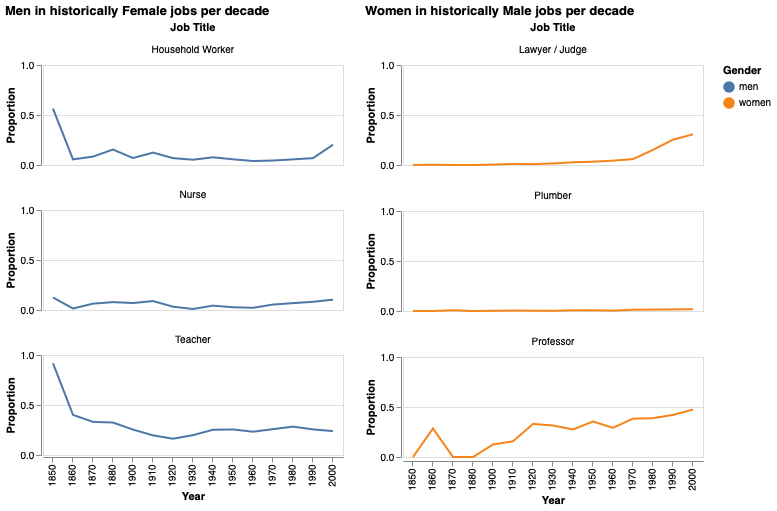

In [8]:
female_df = df[df['job'].isin(["Nurse", "Teacher", "Household Worker"])]
male_df = df[df['job'].isin(["Professor","Plumber", "Lawyer / Judge"])]

label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

historically_female = alt.Chart(female_df).mark_line().encode(
    alt.X('year:O', title="Year"),
    alt.Y('annual_gender_prop_in_job:Q', title='Proportion', scale= alt.Scale(domain=[0,1])),
    color = alt.Color('sex', title = 'Gender')
).transform_filter(
    alt.datum.sex == "men"
).properties(
    width = 300,
    height = 100
)

historically_male = alt.Chart(male_df).mark_line().encode(
    alt.X('year:O', title="Year"),
    alt.Y('annual_gender_prop_in_job:Q', title='Proportion', scale= alt.Scale(domain=[0,1])),
    color = alt.Color('sex', title = 'Gender')
).properties(
    width = 300,
    height = 100
).transform_filter(
    alt.datum.sex == "women"
)

historically_female_w_interaction = alt.layer(
    historically_female, # base line chart
    alt.Chart().mark_rule(color='#aaa').encode(
        x='year:O'
    ).transform_filter(label),
    historically_female.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),
    historically_female.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='annual_gender_prop_in_job:Q'
    ).transform_filter(label),
     historically_female.mark_text(align='left', dx=5, dy=-5).encode(
        text='annual_gender_prop_in_job:Q'
    ).transform_filter(label),
    data = female_df
).facet(
    facet = alt.Facet('job', title = "Job Title"),
    columns = 1,
    title = "Men in historically Female jobs per decade"
)

historically_male_w_interaction = alt.layer(
    historically_male, # base line chart
        alt.Chart().mark_rule(color='#aaa').encode(
        x='year:O'
    ).transform_filter(label),
    historically_male.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),
    historically_male.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='annual_gender_prop_in_job:Q'
    ).transform_filter(label),
     historically_male.mark_text(align='left', dx=5, dy=-5).encode(
        text='annual_gender_prop_in_job:Q'
    ).transform_filter(label),
    data = male_df
).facet(
    facet = alt.Facet('job', title = "Job Title"),
    columns = 1,
    title = "Women in historically Male jobs per decade"
)

historically_female_w_interaction | historically_male_w_interaction

## 8. Summary and conclusions
rubric={reasoning:10}

**Task: Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations.**

According to my findings, the three jobs I chose to represent historically female jobs were more male dominated or balanced in the 1850's, which makes sense as to my knowledge it was less common for women to work at all at the time. That being said, the data from then on did show the disparity I had presumed. The divide between men and women in teaching jobs was not as drastic as I had presumed, but still favoured women. No drastic change in balance was noticed for either Teachers or Nurses, but proportions of male Household workes did increase in the 2000's. As for historically male jobs, Plumbing has remained completely male dominated over the past 150 years, while the proportion of women in Lawyer/Judge jobs has seen a steep increase starting in the 1970's, reaching 30% in 2000 and trending towards overtaking men. The findings on the Professor job surprised me as it is not as historically male dominated as I had assumed it would be. While it was male dominated before the 1900's, besides from a peak of women in the field in 1860, women have been steadily closing the gap with a near perfectly balanced split as of 2000. 


In conclusion, while the historically female job of teacher, nurse, and household worker, and the historically male job of plumber, have not seen an increase in male or female workers respectively to balance the divide in the last 150 years, the historically male jobs of Lawyer/Judge and Professor have reached nearly perfectly balanced since 2000. To me this is indicative of women's fight for representation, and the spread of toxic masculinity and damaging ideas like those that "womens jobs" are of less value than "mens jobs".

## (Optional) 9. Contribute to the Altair package (up to 15 marks)

#### Call for contributions

This message is from the Altair developers:

> We are always interested in new examples contributed from the community.  These could be everything from simple one-panel scatter and line plots, to more
complicated layered or stacked plots, to more advanced interactive features. Before submitting a new example check the [Altair Example
Gallery](https://altair-viz.github.io/gallery/index.html) to make sure that
your idea has not already been implemented. 
> 
>The easiest way to get started would be to adapt examples from the [Vega-Lite
example gallery](https://vega.github.io/vega-lite/examples/) which are missing
in the altair gallery. Or you can feel free to be creative and build your own
visualizations.

**After going through two weeks of using Altair, you have likely learned many things about its syntax. As the Altair package is still in its infancy and the documentation is still improving, I want to give you a chance to contribute your knowledge and experience back to this open source project. Below are the instructions:**

- Go to the issues page of my [fork of the Altair repo](https://github.com/firasm/DSCI_531_2019_altair/issues)
- If you know the contribution you want to make, create an issue and tag me (@firasm) so I can give you the go-ahead and assign your future contribution an effort level (see below)
- If you do not know the contribution you want to make, browse the list of issues and comment on one you'd like to tackle. It will be first come, first served
- I have added all of you as contributors to the repo with write access and protected only the master branch
- Checkout a new branch with your cwl and a brief [slug](https://en.wikipedia.org/wiki/Slug_(publishing)) identifying your change (for e.g., `fmoosvi-histogram_line`)
- Work on your branch, and once you're done send a PR to my fork. 
- That is sufficient for you to get the optional marks on this question. 
- We'll then review it and give you feedback, or make minor changes ourselves and then submit it to the main Altair repo (crediting you as the original author)
- It's preferred to use one of the vega datasets as they're open and easily accessible
- There are four levels of contributions and they're awarded points based on amount of effort:
    - Extreme effort (e.g.: Multiple plot examples, case studies, or major improvements with documentation - 15 points)
    - High effort (e.g.: Complex plot examples, case study, or documentation improvements - 10 points)
    - Moderate effort (e.g.: A plot example, or minor improvements to documentation - 5 points)
    - Basic effort (e.g.: Minimal effort plots and/or changing existing examples to do wrangling using pandas rater than Altair - 1 point)

- Once you have an example you would like to add there are a few guide lines to follow. Every example should:
    - be saved as a stand alone `.py` file in the `altair/examples/` [directory](https://github.com/firasm/DSCI_531_2019_altair/tree/master/altair/examples).
    - have a descriptive docstring, which will eventually be extracted for the
  documentation website.
    - contain a category tag (possible options: Simple Charts, Bar Charts, Line Charts, Area Charts, Scatter Plots, Histograms, Interactive Charts, Case Studies, Other Charts)
    - define a chart variable with the main chart object (This will be used both in the unit tests to confirm that the example executes properly, and also eventually used to display the visualization on the documentation website).
    - not make any external calls to download data within the script (i.e. don't
  use urllib). You can define your data directly within the example file,
  generate your data using pandas and numpy, or you can use data
  available in the `vega_datasets` package.

> Add a link to your PR and issue here.
>
> Link to GH issue: 
>
> PR to Firas' fork: 

### (Optional) 9.1 Extreme effort 
rubric={quality:15}

### (Optional) 9.2 High effort 
rubric={quality:10}

### (Optional) 9.3 Moderate effort 
rubric={quality:5}

### (Optional) 9.4 Basic effort 
rubric={quality:1}

In [9]:
#reassigning for easier debugging
df = data.jobs()
# remove `perc` column
df = df.drop(columns = 'perc')
# count the total number of people in each job by year
gender_year_df = df.groupby(["year","job"]).agg(sum).reset_index()
gender_year_df = gender_year_df.rename(columns={"count": "total"})
# merge the totals with our original data frame to get a total associated with each row
df = df.merge(gender_year_df, how = "left", on = ["year","job"])
# create a proportion column for proportion of men and women in each job by year
df['annual_gender_prop_in_job'] = df['count']/df['total']
# sort the values of my df so its more visulay aligned with my wrangling
df = df.sort_values(by=["year","job","sex"])
# remove the unnecessary `total` column used solely for intermediary calculations
df = df.drop(columns = 'total')

df.head()

,job,sex,year,count,annual_gender_prop_in_job
0,Accountant / Auditor,men,1850,708,1.0
15,Accountant / Auditor,women,1850,0,0.0
30,Actor,men,1850,506,1.0
45,Actor,women,1850,0,0.0
60,Advertising Agent,men,1850,0,NaN


In [110]:
jobs = data.jobs()
grouped_jobs = jobs.pivot_table(
  columns=['sex'], 
  values=['count', 'perc'], 
  index=['year', 'job']
)

# Categorize each row into a gender dominant group 
# based on its male to female ratio of that year
def categorize_gender_dominant_group(row):  
  male_count = row['count']['men']
  female_count = row['count']['women']
  
  if male_count == 0 and female_count == 0:
    return 'no job'
  elif row['count']['women'] == 0:
    return 'only male'
  elif row['count']['men'] == 0:
    return 'only female'
  elif (male_count/female_count) >= 2:
    return 'male dominant'
  elif (male_count/female_count) <= 0.5:
    return 'female dominant'
  else:
    return 'balanced'

jobs.head()




,job,sex,year,count,perc
0,Accountant / Auditor,men,1850,708,0.000131
1,Accountant / Auditor,men,1860,1805,0.000214
2,Accountant / Auditor,men,1870,1310,0.000100
3,Accountant / Auditor,men,1880,2295,0.000125
4,Accountant / Auditor,men,1900,11753,0.000396


In [111]:
grouped_jobs.head()

count            perc          
sex                         men women       men     women
year job                                                 
1850 Accountant / Auditor   708     0  0.000131  0.000000
     Actor                  506     0  0.000094  0.000000
     Advertising Agent        0     0  0.000000  0.000000
     Agent                 2528     0  0.000468  0.000000
     Apprentice            3134   101  0.000580  0.000019

In [112]:
grouped_jobs['gender_dominant_group'] = grouped_jobs.apply(categorize_gender_dominant_group, axis=1)
grouped_jobs_fixed = grouped_jobs.drop(['count','perc'], axis=1)
grouped_jobs_fixed2 = grouped_jobs_fixed.reset_index()
grouped_jobs_fixed2.columns=grouped_jobs_fixed2.columns.droplevel(1)
grouped_jobs_fixed2.head()

,year,job,gender_dominant_group
0,1850,Accountant / Auditor,only male
1,1850,Actor,only male
2,1850,Advertising Agent,no job
3,1850,Agent,only male
4,1850,Apprentice,male dominant


In [113]:
pd.merge(jobs,grouped_jobs_fixed2, how = 'inner', on = ['year','job'] )

,job,sex,year,count,perc,gender_dominant_group
0,Accountant / Auditor,men,1850,708,0.000131,only male
1,Accountant / Auditor,women,1850,0,0.000000,only male
2,Accountant / Auditor,men,1860,1805,0.000214,only male
3,Accountant / Auditor,women,1860,0,0.000000,only male
4,Accountant / Auditor,men,1870,1310,0.000100,only male
...,...,...,...,...,...,...
7645,Welder,women,1980,57920,0.000451,male dominant
7646,Welder,men,1990,700666,0.004698,male dominant
7647,Welder,women,1990,36224,0.000243,male dominant
7648,Welder,men,2000,727405,0.004327,male dominant


In [115]:
#reassigning for easier debugging
df = pd.merge(jobs,grouped_jobs_fixed2, how = 'inner', on = ['year','job'] )
# remove `perc` column
df = df.drop(columns = 'perc')
# count the total number of people in each job by year
gender_year_df = df.groupby(["year","job"]).agg(sum).reset_index()
gender_year_df = gender_year_df.rename(columns={"count": "total"})
# merge the totals with our original data frame to get a total associated with each row
df = df.merge(gender_year_df, how = "left", on = ["year","job"])
# create a proportion column for proportion of men and women in each job by year
df['annual_gender_prop_in_job'] = df['count']/df['total']
# sort the values of my df so its more visulay aligned with my wrangling
df = df.sort_values(by=["year","job","sex"])
# remove the unnecessary `total` column used solely for intermediary calculations
df = df.drop(columns = 'total')
# remove rows with na proportions to lower job count
df = df.dropna(axis=0)
df.head()

,job,sex,year,count,gender_dominant_group,annual_gender_prop_in_job
0,Accountant / Auditor,men,1850,708,only male,1.0
1,Accountant / Auditor,women,1850,0,only male,0.0
30,Actor,men,1850,506,only male,1.0
31,Actor,women,1850,0,only male,0.0
90,Agent,men,1850,2528,only male,1.0
